# Aprendizado Dinâmico


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

1. **Séries temporais**: Conceitos básicos. Sazonalidade, tendência. Suavização e Alisamento exponencial. 
2. **Séries estacionárias**.
3. Função de **autocovariância e autocorrelação**.
4. **Modelos: ARMA, ARIMA, SARIMA**: Identificação, Estimação, Previsão, Diagnósticos.
5. **Modelos estruturais**: espaço de estado e previsão Bayesiana.
6. **Previsão de séries temporais**: Método theta, Método theta expandido.
7. **Redes Dinâmicas**: Representação, manipulação e visualização, Caracterização de redes dinâmicas, Modelagem de redes dinâmicas.
8. **Análise de Sobrevivência**: Peculiaridades dos dados, Estimação não paramétrica, Funções de sobrevivências usuais, Ajuste de modelos, Modelos de longa duração, Regressão em análise de sobrevivência

**Referências:**

1. **Moretting, P.A.; Toloi, C.M.C. Análise de Séries Temporais - Modelos lineares univariados. Blucher, 2018.**
2. Eric D. Kolaczyk, Gábor Csárdi (2014). Statistical Analysis of Network Data with R, Springer.
3. Paul S.P. Cowpertwait, Andrew V. Metcalfe (2009). Introductory Time Series with R, Springer.
4. Louzada-Neto, F. ; Mazucheli, J. ; Achcar, J.A. . Análise de Sobrevivência e Confiabilidade. Lima, Peru: Instituto de Matematicas y Ciencias Afines, IMCA, 2002.
5. Colosimo, E. A. ; Giolo, S. R. Análise de Sobrevivência Aplicada. Blucher, 2006.
6. Hyndman, R. ; Athanasopoulos, G. Forcasting: Principles and Practice. OTexts, 2018.
7. **Ehlers, R.S. (2009) Análise de Séries Temporais, [http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf](http://www.icmc.usp.br/~ehlers/stemp/stemp.pdf). Acessado em 28/06/2020.**

... e outras referências que serão citadas ao longo do curso.


# Aula 1.    Séries temporais



## Programa

a. Conceitos básicos.

b. Visualização de séries temporais.

c. Sazonalidade, tendência.

d. Suavização e Alisamento exponencial. 

### O que é uma série temporal?

**<span style="color:darkred">Uma série temporal é qualquer conjunto de observações ordenadas no tempo.</span>**

**Exemplos**

- valores diários de poluição na cidade de São Paulo

- número de óbitos diários registrados por COVID-19 no Brasil

- índices diários da Bovespa

- registro de marés no porto de Santos


**Objetivos**

São objetivos gerais dos estudos de séries temporais:

- Identificar padrões como tendência, sazonalidade, observações discrepantes (outliers);

- Usar a variação passada de uma série para predizer valores futuros. Embora não seja possível prever exatamente os valores futuros, podemos predizer um comportamento aproximado das próximas observações;

- Entender a variação conjunta de duas séries, e utilizar uma série para explicar a variação em outra série.

#### Para uma série temporal, observações vizinhas estão correlacionadas. Se em modelos de regressão a ordem das observações não importa, em modelos de séries temporais a ordem dos dados é crucial (Ehlers, 2009).

Algumas características são particulares a esse tipo de dados, por exemplo:


- Observações correlacionadas são mais difíceis de analisar e requerem técnicas específicas.

- Precisamos levar em conta a ordem temporal das observacoes. 

- Fatores complicadores como presenca de tendências e variação sazonal ou cíclica podem ser difíceis de estimar ou remover. 

- A seleção de modelos pode ser bastante complicada, e as ferramentas podem ser de difícil interpretação.

- É mais difıcil de lidar com observações perdidas e dados discrepantes devido à natureza sequencial.


## Motivação - Séries Temporais

### Exemplo: Dados de COVID-19 no estado de SP

Fonte: Brasil.IO: boletins epidemiológicos da COVID-19 por município por dia, disponível em: [https://brasil.io/datasets/](https://brasil.io/datasets/) (acesso em 08/03/2021, serão utilizados dados até 31/12/2020). 

In [1]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

pkgdir = '/hdd/MBA/AprendizadoDinamico/Data'


In [2]:
# COVID - Leitura dos dados
covid = pd.read_csv('covid_caso.csv', index_col='date', parse_dates=True)

covid.head()

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-12-30,AP,NaN,state,67702,919,282,False,845731.0,861773.0,16.0,7856.12917,0.0136
2020-12-29,AP,NaN,state,67405,913,281,False,845731.0,861773.0,16.0,7821.66533,0.0135
2020-12-28,AP,NaN,state,67149,907,280,False,845731.0,861773.0,16.0,7791.95914,0.0135
2020-12-27,AP,NaN,state,66724,901,279,False,845731.0,861773.0,16.0,7742.64220,0.0135
2020-12-26,AP,NaN,state,66293,901,278,False,845731.0,861773.0,16.0,7692.62903,0.0136


In [3]:
covid

,state,city,place_type,confirmed,deaths,order_for_place,is_last,estimated_population_2019,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
date,,,,,,,,,,,,
2020-12-30,AP,NaN,state,67702,919,282,False,845731.0,861773.0,16.0,7856.12917,0.0136
2020-12-29,AP,NaN,state,67405,913,281,False,845731.0,861773.0,16.0,7821.66533,0.0135
2020-12-28,AP,NaN,state,67149,907,280,False,845731.0,861773.0,16.0,7791.95914,0.0135
2020-12-27,AP,NaN,state,66724,901,279,False,845731.0,861773.0,16.0,7742.64220,0.0135
2020-12-26,AP,NaN,state,66293,901,278,False,845731.0,861773.0,16.0,7692.62903,0.0136
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-23,SP,Óleo,city,1,0,5,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-22,SP,Óleo,city,1,0,4,False,2496.0,2471.0,3533809.0,40.46945,0.0000
2020-06-21,SP,Óleo,city,1,0,3,False,2496.0,2471.0,3533809.0,40.46945,0.0000


In [3]:
# Vamos trabalhar com dados do estado de SP 

covid = pd.read_csv('covid_caso.csv', index_col=0, parse_dates=True)
covid.index = covid.index.to_period("D")

covid = covid.loc[(covid['state']=='SP')&(covid['place_type']=='state'),['confirmed','deaths']]

covid.head()


,confirmed,deaths
date,,
2020-12-30,1452078,46477
2020-12-29,1440229,46195
2020-12-28,1427752,45902
2020-12-27,1426176,45863
2020-12-26,1423340,45808


<AxesSubplot:xlabel='date'>

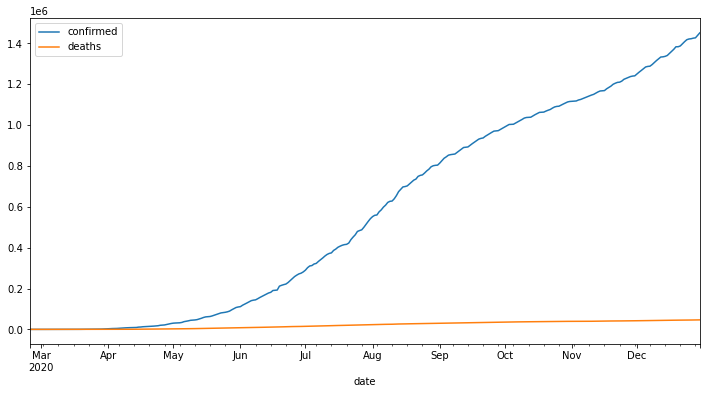

In [4]:
covid.plot(figsize=(12,6))

In [5]:
# Ordenar dados pela data em ordem crescente

covid = covid.sort_values(by=['date'])

covid.head()

,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,2,0
2020-02-29,2,0


In [7]:
x=[1,3,5,6,788,32,2]
np.diff(x)

array([   2,    2,    1,  782, -756,  -30])

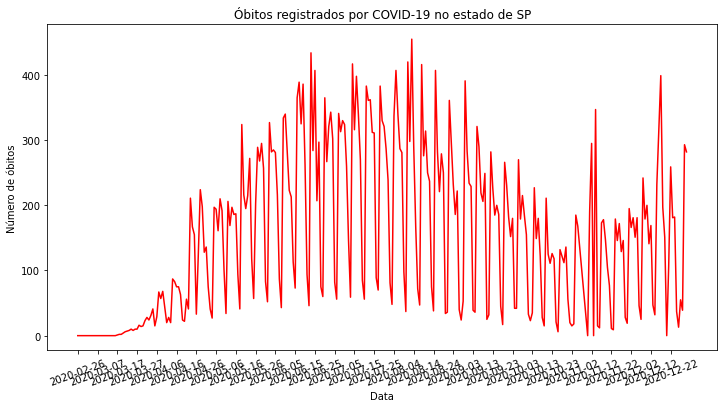

In [8]:
# COVID - Considere agora os dados de mortes diárias

# np.diff calcula as diferenças no número de mortes diárias

y = list(np.diff(covid['deaths']))
x = covid.index[1:].to_timestamp() # Note o subconjunto de dados em x iniciando em 1 pois interessa as diferenças

plt.rcParams['figure.figsize'] = [12,6]

plt.rc('font', size=10) # Altera o tamanho da fonte
plt.plot(x,y,label="Real data",color="red") # Plota os dados

plt.xticks(np.arange(x.min(),x.max(),10, dtype='datetime64[D]'),rotation=20)
plt.title("Óbitos registrados por COVID-19 no estado de %s" % 'SP')
plt.xlabel("Data")
plt.ylabel("Número de óbitos")
plt.ylim()
plt.show()


**Exercício** 

Salve como uma nova base de casos e mortes diárias de COVID-19 com o nome covidSP.csv

In [8]:
covid

,confirmed,deaths
date,,
2020-02-25,1,0
2020-02-26,1,0
2020-02-27,1,0
2020-02-28,2,0
2020-02-29,2,0
...,...,...
2020-12-26,1423340,45808
2020-12-27,1426176,45863
2020-12-28,1427752,45902


In [9]:
import numpy as np

y1 = list(np.diff(covid['confirmed']))
y2 = list(np.diff(covid['deaths']))
x = covid.index[1:].to_timestamp() # Note o subconjunto de dados em x iniciando em 1 pois interessa as diferenças

covidSP = pd.DataFrame({'date':x,'confirmed':y1,'deaths':y2})

covidSP = covidSP.set_index('date') 

covidSP.to_csv('covidSP.csv')


**Exercícios**

1. Mesmo antes das definições formais, o que você entende por **tendência** e **sazonalidade** dos dados nesse caso?

2. Por que elas ocorrem? 

3. Faça a leitura e gráfico de mortes diárias por COVID-19 para o estado do RJ.


<AxesSubplot:xlabel='date'>

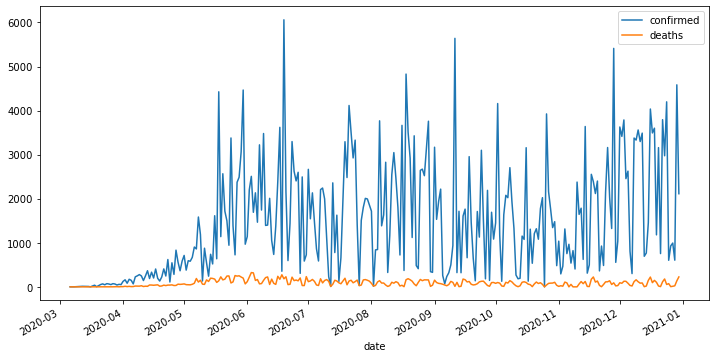

In [10]:
# ATENÇÃO! Comandos auxiliares para o exercício 3 

covid = pd.read_csv('covid_caso.csv', index_col=0, parse_dates=True)
covid.index = covid.index.to_period("D")

covid = covid.loc[(covid['state']=='RJ')&(covid['place_type']=='state'),['confirmed','deaths']]

covid = covid.sort_values(by=['date'])

y1 = list(np.diff(covid['confirmed']))
y2 = list(np.diff(covid['deaths']))
x = covid.index[1:].to_timestamp() # Note o subconjunto de dados em x iniciando em 1 pois interessa as diferenças

covidRJ = pd.DataFrame({'date':x,'confirmed':y1,'deaths':y2})

covidRJ = covidRJ.set_index('date') 

covidRJ.to_csv('covidRJ.csv')

covidRJ.plot()


### Motivação - Tendência e Sazonalidade

Considere o problema de decompor a série de mortes em **tendência, sazonalidade e resíduos (ruído)**. São conceitos que veremos adiante, mas usamos este problema para motivar o estudo de séries temporais.

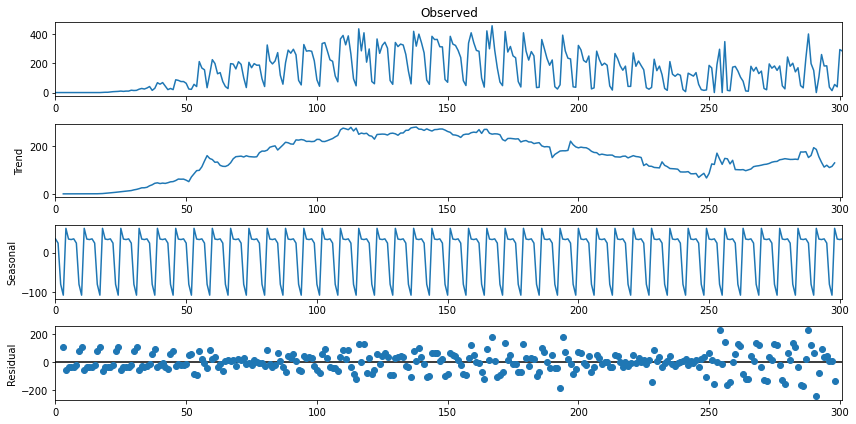

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

# y aqui são as mortes em SP

mortes = np.array(y)

result = seasonal_decompose(mortes, model='additive', period=7)
result.plot()

pyplot.show()

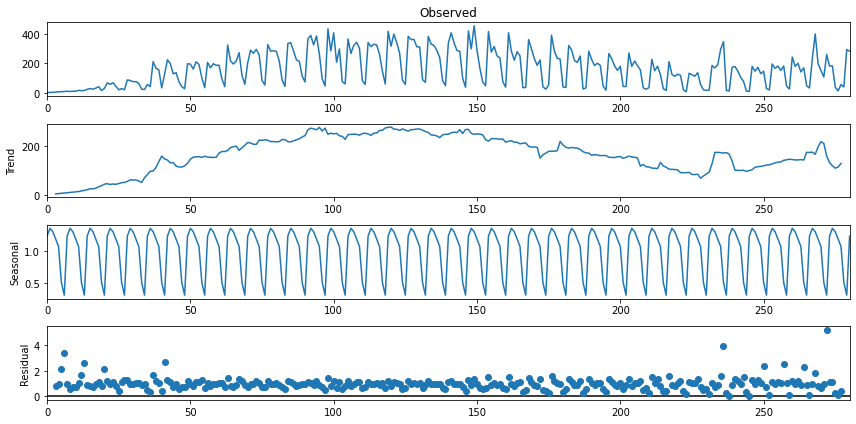

In [12]:
mortes = np.array(y)
mortes_pos = mortes[mortes>0]

result = seasonal_decompose(mortes_pos, model='multiplicative', period=7)
result.plot()

pyplot.show()

# Conceitos básicos

## Processos estocásticos

Os modelos utilizados para descrever séries temporais são processos estocásticos. Em geral, assume-se que uma **série temporal observada é uma realização de um processo estocástico adjacente**.


**Definição**

Seja $T$ um conjunto arbitrário. Um _processo estocástico_ é uma família $Z = \{Z(t), t\in T\}$ tal que, para cada $t\in T$, $Z(t)$ é uma variável aleatória.


Um processo estocástico pode ser visto como uma família de variáveis aleatórias. Por outro lado, uma realização ou trajetória do processo estocástico pode ser visto como uma **série temporal**.



O **espaço de estados** de um processo estocástico é o conjunto de todos os possíveis valores que as variáveis aleatórias $Z(t)$ podem assumir.

Os processos estocásticos podem ser **discretos**, por exemplo, o número de chamadas telefônicas que chega a uma central em duas horas, ou **contínuo**, por exemplo o preço de um ativo financeiro. 

Poderíamos descrever um processo estocástico por meio da distribuição de probabilidade conjunta de $Z(t_1),\ldots,Z(t_k)$, mas aqui abordaremos o assunto de uma forma um pouco mais simples. Vamos portanto utilizar as funções (para o caso contínuo)

- Média: $\mu(t) = E(Z(t))$

- Variância: $\sigma^2(t) = Var(Z(t))$

- Autocovariância: $\gamma(t_1,t_2) = E[Z(t_1)-\mu(t_1)][Z(t_2)-\mu(t_2)]$



### Alguns exemplos de processos estocásticos conhecidos

- Sequência aleatória

- Ruído branco

- Passeio aleatório


### Sequência aleatória 

Considere $\{X_n,n=1,2,\ldots\}$ uma sequência de v.a. definidas no mesmo espaço amostral $\Omega$. Aqui, $\mathcal{T}=\{1,2,\ldots\}$ e temos um processo com parâmetro discreto, ou uma sequência aleatória. Para todo $n\geq 1$, podemos escrever

$$P(X_1=a_1,\ldots,X_n=a_n) = P(X_1=a_1)P(X_2=a_2|X_1=a_1)\ldots P(X_n=a_n|X_1=a_1,\ldots,X_{n-1}=a_{n-1})$$

### Ruído branco (white noise)

Dizemos que $\{\epsilon_t,t\in \mathbb{Z}\}$ é um ruído branco se as v.a. $\epsilon_t$ são não-correlacionadas, isto é, se $Cov\{\epsilon_t,\epsilon_s\}=0$ para $t\neq s$.

Esse processo será estacionário se $E(\epsilon_t)=\mu_\epsilon$ e $Var(\epsilon_t)=\sigma^2_\epsilon$ para todo $t$.

### Passeio aleatório (random walk)

Considere uma sequência aleatória $\{\epsilon_t,t\geq 1\}$ de v.a. i.i.d $(\mu_\epsilon,\sigma^2_\epsilon)$. Defina a sequência 

$$X_t = \epsilon_1 + \ldots + \epsilon_t .$$

Segue que 

$E(X_t) = t \mu_\epsilon$ e $Var(X_t ) = t\sigma^2_\epsilon$, ou seja, ambos dependem de $t$. 

Esse processo é chamado de passeio aleatório e é claramente não estacionário.

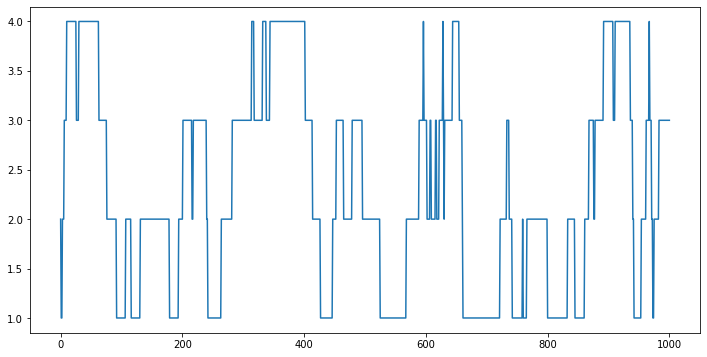

In [13]:
# Exemplo de passeio aleatório - Inspirado em https://www.geeksforgeeks.org/random-walk-implementation-python/
import random 
import numpy as np 
import matplotlib.pyplot as plt 

# Probabilidade de mover para baixo ou para cima
prob = [0.05, 0.95] 

# Definição da posição inicial
start = 2
positions = [start] 

# Criação de pontos aleatórios
rr = np.random.random(1000) 
downp = rr < prob[0] 
upp = rr > prob[1] 


for idownp, iupp in zip(downp, upp): 
	down = idownp and positions[-1] > 1
	up = iupp and positions[-1] < 4
	positions.append(positions[-1] - down + up) 

# Gráfico de um passeio aleatório em uma dimensão
plt.plot(positions) 
plt.show() 


### Processos estocásticos estacionários

Um processo é estacionário se ele se desenvolver no tempo de modo que a escolha da origem não seja importante.

Em outras palavras, as características de $Z(t+\tau)$ são as mesmas de $Z(t)$.

### Processos normais (Gaussianos)

Um processo estocástico $Z = \{Z(t), t\in \mathcal{T}\}$ é dito ser Gaussiano se, para qualquer conjunto $t_1, t_2,\ldots, t_n $ de $\mathcal{T}$ as variáveis aleatórias $Z(t_1),\ldots, Z(t_n)$ têm distribuição normal n-variada.



### Séries Temporais


Considere uma série temporal $Z(t_1),Z(t_2),\ldots,Z(t_n)$ observada nos instantes $t_1,\ldots,t_n$, ou seja, uma realização ou trajetória de um processo estocástico. Temos interesse em

- Investigar o mecanismo gerador da série 

- Fazer previsões para valores futuros da série

- Descrever o comportamento da série

- Procurar periodicidades relevantes nos dados



As séries temporais podem ser **contínuas**, quando as observações são feitas continuamente no tempo. Nesse caso, 

$$\{Z (t) : t ∈ T \}, T = \{t : t_1 < t < t_2 \}.$$

Ou podem ser **discretas**, quando as observações são feitas em tempos específicos

$$\{Z (t) : t ∈ T \}, T = \{t_1 , . . . , t_n \}.$$




A partir daqui, adotaremos também a notação $\{Z_t\}$ para representar uma série temporal.

Séries contı́nuas podem ser discretizadas se os valores são registrados a certos intervalos de tempo.

Séries podem ter valores agregados ou acumulados em intervalos de tempo, e.g. exportações medidas mensalmente ou quantidade de chuva medida diariamente.

Algumas séries são inerentemente discretas, e.g. dividendos pagos por uma empresa aos seus acionistas em anos sucessivos.

A série temporal é multivariada se k variáveis são observadas a cada tempo $\{Z_{1t} , . . . , Z_{kt} , t ∈ T \}$. As séries correlacionadas devem ser analisadas conjuntamente e em cada tempo tem-se um vetor de observações.



# Visualização de séries temporais

## Exemplos 

<AxesSubplot:xlabel='Mês'>

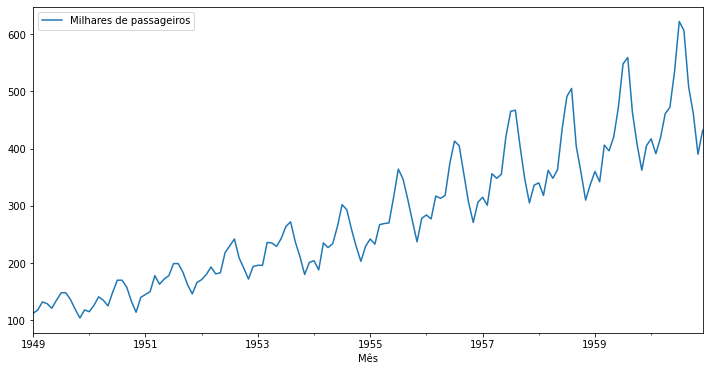

In [14]:
### Passageiros

# Agendamento de passageiros (em milhares) por mês na Pan Am nos Estados Unidos, observadas mensalmente no período de 1949-1960 (Brown, R. G. "Smoothing." Forecasting and Prediction of Discrete Time Series, 1963).
# A companhia usou os dados para prever a demanda futura e antes de programar compras e novas aeronaves e de treinar funcionários. 

# Air Passengers: Passageiros aéreos
passageiros = pd.read_csv(f'{pkgdir}/airline_passengers.csv', index_col=0,
                            parse_dates=True)

passageiros.index = passageiros.index.to_period("M")

passageiros.plot(figsize=(12,6))


<AxesSubplot:xlabel='date'>

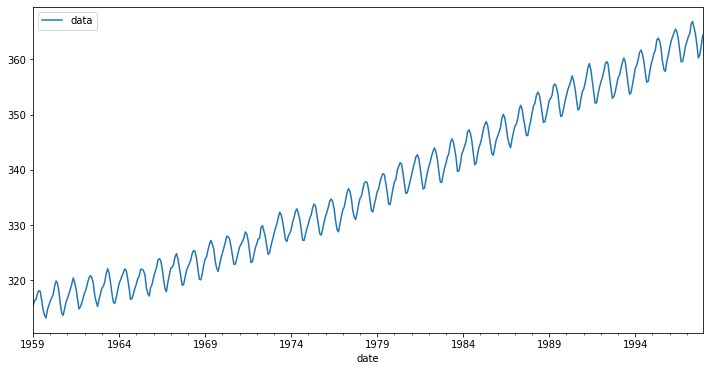

In [15]:
# Exemplo - CO2

# CO2 Concentrações atmosfericas de CO2 (em ppm) janeiro/1953 a dezembro/1997
# Fonte: https://github.com/mjuez/pytsdatasets/
co2 = pd.read_csv(f'{pkgdir}/co2.csv', index_col=0, parse_dates=True)
co2.index = co2.index.to_period("M")

co2.plot(figsize=(12,6))

<AxesSubplot:xlabel='year'>

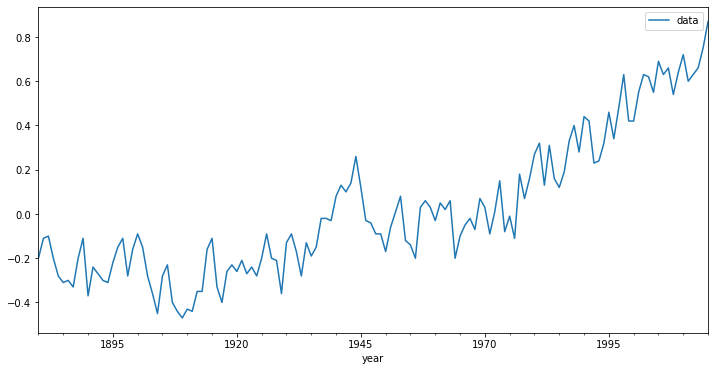

In [16]:
# Temperatura global

# Diferenças na média de temperatura global. 
# Fonte: https://github.com/mjuez/pytsdatasets/

globaltemp = pd.read_csv(f'{pkgdir}/globaltemp.csv', index_col=0,
                         parse_dates=True)
globaltemp.index = globaltemp.index
globaltemp.plot(figsize=(12,6))


In [17]:
globaltemp

,data
year,
1880-01-01,-0.20
1881-01-01,-0.11
1882-01-01,-0.10
1883-01-01,-0.20
1884-01-01,-0.28
...,...
2011-01-01,0.60
2012-01-01,0.63
2013-01-01,0.66


<AxesSubplot:xlabel='date'>

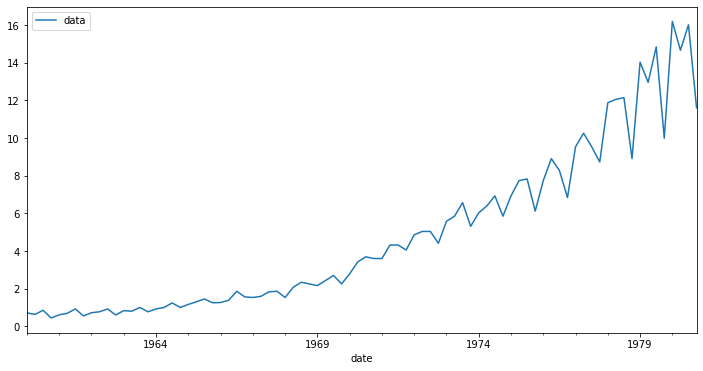

In [18]:
# Jhonson & Johnson

# Ganhos quadrimestrais da Jhonson & Jhonson 
# Fonte: https://github.com/mjuez/pytsdatasets/

jj = pd.read_csv(f'{pkgdir}/jj.csv', index_col=0, parse_dates=True)
jj.index = jj.index.to_period("Q")
jj.plot(figsize=(12,6))


<AxesSubplot:xlabel='date'>

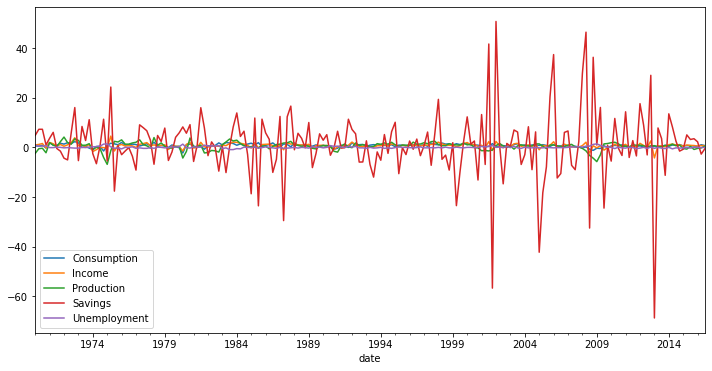

In [19]:
# US Change 1970 a 2016
# Fontes: 
# Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018. 
# Dados disponíveis em  https://github.com/robjhyndman/fpp2-package

# Percentage changes in quarterly personal consumption expenditure, personal disposable income, production, savings and the unemployment rate for the US, 1960 to 2016.

uschange = pd.read_csv(f'{pkgdir}/uschange.csv', index_col=0,
                       parse_dates=True)
uschange.index = uschange.index.to_period("Q")
uschange.plot(figsize=(12,6))

In [20]:
uschange

,Consumption,Income,Production,Savings,Unemployment
date,,,,,
1970Q1,0.615986,0.972261,-2.452700,4.810312,0.9
1970Q2,0.460376,1.169085,-0.551525,7.287992,0.5
1970Q3,0.876791,1.553271,-0.358708,7.289013,0.5
1970Q4,-0.274245,-0.255272,-2.185455,0.985230,0.7
1971Q1,1.897371,1.987154,1.909734,3.657771,-0.1
...,...,...,...,...,...
2015Q3,0.664970,0.801663,0.380606,3.180930,-0.3
2015Q4,0.561680,0.740063,-0.845546,3.482786,0.0
2016Q1,0.404682,0.519025,-0.417930,2.236534,0.0


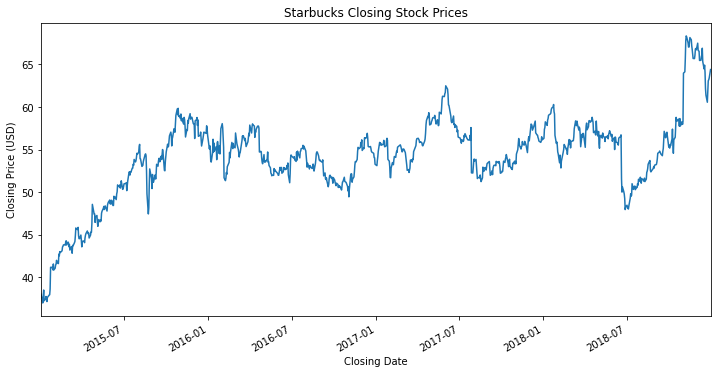

In [21]:
# Preço de fechamento e volume negociado de ações da Starbucks entre 2015 e 2018
# SBUX dataset
# Mais informações em https://medium.com/analytics-vidhya/pull-open-source-stock-price-history-using-python-d67ad0e3efe2

df = pd.read_csv(f'{pkgdir}/starbucks.csv',index_col='Date',parse_dates=True)

title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);


Neste momento, faremos uma pausa para falar um pouco mais de Visualização de séries temporais, e em seguida falaremos de tendência e sazonalidade!